Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV

In [2]:
def plot_data(X,y,ax,title):
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s = 30, edgecolor=(0,0,0,0.5))
    ax.set_ylabel('Principle Component 1')
    ax.set_xlabel('Principle Component 2')
    if title is not None:
        ax.set_title(title)

Define layer name

In [3]:
folder_name = 'label_09'

Label 01

In [4]:
cols = list(pd.read_csv(f"{folder_name}/train.csv", nrows=1))
train_data = pd.read_csv(f"{folder_name}/train.csv",usecols =[i for i in cols if i not in ["label_4", "label_3", "label_2"]])
train_data.shape

(28520, 769)

Handling missing values

In [5]:
train_data = train_data.dropna()
print(train_data.shape)
train_data.head()

(28520, 769)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1
0,0.019301,0.059756,0.081375,0.057481,-0.068440,-0.165913,0.035643,-0.091138,0.021688,0.057158,...,0.124449,0.124765,-0.235671,-0.035576,0.127319,0.098128,-0.058787,0.100971,-0.047754,45
1,0.049741,0.090030,0.035118,-0.013676,-0.194317,-0.101763,0.085875,-0.081317,0.112418,0.120523,...,0.186260,0.085101,-0.365903,0.020538,0.058968,0.029803,0.111324,0.036727,0.031927,45
2,0.019212,0.087779,0.093907,-0.033738,-0.141409,-0.062881,-0.071402,-0.006599,0.020372,-0.027777,...,0.019542,0.144256,-0.123374,0.119645,-0.040861,0.000548,-0.061003,-0.042450,0.063340,45
3,0.070283,0.049040,0.042126,0.122637,-0.056964,-0.113700,0.108454,0.051336,0.086610,0.141578,...,0.117235,-0.038984,-0.028714,-0.124494,-0.169225,-0.046391,0.148787,0.014616,-0.140644,45
4,0.028864,0.165634,0.016302,0.036117,-0.028871,-0.147748,0.053180,0.025071,-0.004200,-0.022183,...,0.029716,0.077643,-0.182132,-0.124862,0.044907,0.084005,-0.038450,0.084371,-0.072146,45


numbers of missing values neglegible

Import test data set

In [6]:
cols = list(pd.read_csv(f"{folder_name}/valid.csv", nrows=1))
valid_data = pd.read_csv(f"{folder_name}/valid.csv",usecols =[i for i in cols if i not in ["label_4", "label_3", "label_2"]])
valid_data.shape

(750, 769)

Handling missing values

In [7]:
valid_data = valid_data.dropna()
valid_data.shape

(750, 769)

In [8]:
#features
X_train = train_data.iloc[:,:-1]
Y_train = train_data.iloc[:,-1]
X_valid = valid_data.iloc[:,:-1]
Y_valid = valid_data.iloc[:,-1]

Standarization

In [9]:
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)

X_train_scaler = robust_scaler.transform(X_train)
X_valid_scaler = robust_scaler.transform(X_valid)

Dimensionality reduction

In [10]:
pca = PCA(0.98)
pca = pca.fit(X_train_scaler)

X_train_pca = pca.transform(X_train_scaler)
X_valid_pca = pca.transform(X_valid_scaler)
X_train_pca.shape

(28520, 466)

oversampling and undersampling

<Axes: title={'center': 'Count of Label_2'}>

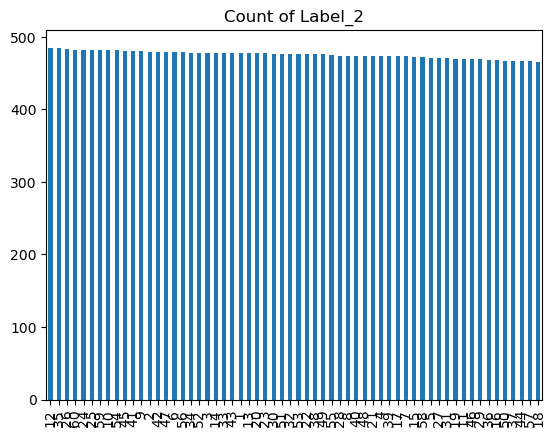

In [11]:
train_data['label_1'].value_counts().plot(kind='bar',title='Count of Label_2')

(28646, 466)


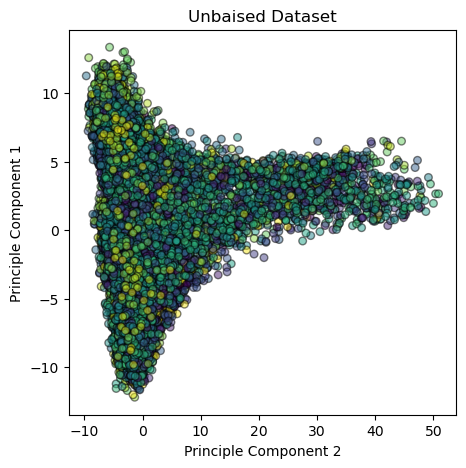

In [12]:
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
# Perform random sampling
smotetomek = SMOTETomek(random_state=0)
X_train_smt, Y_train_smt = smotetomek.fit_resample(X_train_pca, Y_train)
fig,ax = plt.subplots(figsize=(5, 5))
plot_data(X_train_smt, Y_train_smt, ax, title='Unbaised Dataset')
print(X_train_smt.shape)

Using SVC

In [13]:
from sklearn.svm import SVC

In [14]:
svc_init = SVC()
svc_init.fit(X_train_scaler,Y_train)
svc_predicted = svc_init.predict(X_valid_scaler)
accuracy_score(Y_valid,svc_predicted)

0.9466666666666667

After feature engineering

In [15]:
svc = SVC()
svc.fit(X_train_smt, Y_train_smt)
svc_predicted = svc.predict(X_valid_pca)
accuracy_score(Y_valid,svc_predicted)

0.94

In [16]:
cols = list(pd.read_csv(f"{folder_name}/test.csv", nrows=1))
test_data = pd.read_csv(f"{folder_name}/test.csv",usecols =[i for i in cols if i not in ["label_4", "label_3", "label_2"]])
test_data.shape

#features
X_test = test_data.iloc[:,1:]
X_test.head()

X_test_scaler = robust_scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaler)

In [17]:
grid_predictions1 = svc_init.predict(X_test_scaler)
grid_predictions1

array([26, 18, 16,  7, 58, 46,  7, 22, 29, 26, 33,  6, 54, 51, 29, 48, 23,
        2, 43, 42, 11, 35, 39, 36, 44, 48, 28, 55,  2, 51, 55, 46,  1, 56,
       30, 22, 50,  6, 40, 18, 19, 47,  6, 46, 59, 25, 31, 38,  5, 32, 25,
       56, 39, 37, 32, 29, 46, 52, 28, 34, 16, 47, 55, 24, 23, 18, 20,  6,
       36, 38, 22, 28, 44, 46, 55, 59, 49, 25, 57, 12, 52, 38, 29,  4, 31,
       49, 14, 19, 12, 39, 36, 43, 34, 32, 54, 46, 27,  5,  7, 42, 19, 26,
       31, 36, 53, 10, 12, 33, 38,  2, 57, 37, 33, 50, 46, 46, 17, 34, 32,
       40, 19, 40,  8, 22, 38, 15, 39,  9, 52,  5, 28, 13, 10, 55, 28, 25,
       36, 57, 16, 27, 23, 14, 51, 27, 32, 46, 16, 53, 11, 46, 42, 37, 47,
       50,  3, 41, 19, 20, 15,  8,  3, 18,  5, 28, 46, 49, 16, 40, 17, 20,
       29, 57, 27, 16, 11, 35, 34, 52, 41, 55,  7, 18, 21, 19, 37, 55, 29,
       28, 23, 35, 46, 52, 30, 27,  1,  7, 28, 14,  3, 36, 17, 60, 18,  3,
       22,  9, 46, 25, 17, 26, 19, 36, 36, 21,  1, 44, 39, 47, 38,  6, 50,
       39, 23, 37, 48, 22

In [18]:
size = grid_predictions1.size
index = []
for i in range(size):
    index.append(i+1)
data = {
    'ID': index,
    'label_1': grid_predictions1
}
df = pd.DataFrame(data)
df.to_csv('09-1-init.csv', index=False)

Hyper Parameter tuning without dimentionality reduction

In [19]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_smt, Y_train_smt)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.017 total time= 3.1min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.017 total time= 3.2min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.017 total time= 3.2min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.017 total time= 3.2min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.017 total time= 3.1min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.017 total time= 2.6min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.017 total time= 2.6min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.017 total time= 2.6min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.017 total time= 2.6min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.017 total time= 2.6min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.248 total time= 2.6min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.027 total time= 3.2min
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.022 total time= 3.3min
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.025 total time= 3.3min
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.046 total time= 3.3min
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.051 total time= 2.7min
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.064 total time= 2.8min
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.055 total time= 2.8min
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.068 total time= 2.7min
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.115 total time= 2.7min
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.909 total time= 2.7min
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.910 total time= 2.7min
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.912 total time= 2.7min
[CV 4/5] END ....C=1000, gam

In [20]:
grid_predictions = grid.predict(X_valid_pca)

# print classification report
accuracy_score(Y_valid, grid_predictions)

0.9613333333333334

In [21]:
grid_predictions = grid.predict(X_test_pca)
grid_predictions

array([26, 18, 16,  7, 58, 46,  7, 22, 29, 26, 33,  6, 54, 51, 29, 48, 23,
        2, 43, 42, 11, 35, 39, 36, 44, 48, 28, 55,  2, 51, 55, 46,  1, 56,
       30, 22, 50,  6, 40, 18, 19, 47,  6, 46, 59, 25, 31, 38,  5, 32, 25,
       56, 39, 37, 32, 29, 46, 52, 28, 34, 16, 47, 55, 24, 23, 18, 20,  6,
       36, 38, 22, 28, 44, 46, 55, 59, 49, 25, 57, 12, 52, 38, 29,  4, 31,
       49, 14, 19, 12, 39, 36, 43, 34, 32, 54, 46, 27,  5,  7, 42, 19, 26,
       31, 36, 53, 10, 12, 33, 38,  2, 57, 37, 17, 50, 46, 46, 17, 34, 32,
       40, 19, 40,  8, 22, 38, 15, 39,  9, 52,  5, 28, 13, 10, 55, 28, 25,
       42, 57, 16, 27, 23, 14, 51, 27, 32, 46, 16, 53, 11, 46, 42, 37, 47,
       50,  3, 41, 19, 20, 15,  8,  3, 18,  5, 28, 46, 49, 16, 40, 17, 20,
       53, 57, 27, 16, 11, 35, 34, 52, 41, 55,  7, 18, 21, 19, 37, 55, 29,
       28, 23, 35, 46, 52, 30, 27,  1,  7, 28, 14,  3, 36, 17, 60, 18,  3,
       22,  9, 46, 25, 17, 26, 19, 36, 36, 21,  1, 44, 39, 47, 38,  6, 50,
       39, 23, 37, 48, 22

In [22]:
size = grid_predictions.size
index = []
for i in range(size):
    index.append(i+1)
data = {
    'ID': index,
    'label_1': grid_predictions
}
df = pd.DataFrame(data)
df.to_csv('09-1.csv', index=False)